# Assignment 2 - Machine Learning Basics

## Xuan Yu
Netid:  xy93

Github link: https://github.com/Shwan-Yu/machine-learning-course

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. Since the sample size n is extremely large and we don't have enough predictors to fit the model, the inflexible method would have super high bias and would easily lead to underfitting. So flexible method is better than the inflexible one.
2. Since the sample size n is small and we have so many predictors, the flexible method would try to take all predictor into account and try to pass all sample points we have when fitting the model. This would generate high variance model and would easily lead to overfitting. So inflexible method is better than the flexible one.
3. Since we already know the relationship is highly non-linear, using the inflexible model would generate high bias and would lead to underfitting. So flexible method is better than the inflexible one.
4. When we're using a flexible model, it has high variance, which means its parameters would change a lot if there is a small change in the traning data. In this case our training data has high variance of the error, which means a lot of noices. So inflexible method is better than the flexible one.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) 
1. This is a regression problem since CEO's salary is a continuous quantity output.
2. We are more interested in inference for this problem since we care more about what factors affect the outcome variable.

3. sample size: 500; predictors: 3. (profit, number of employees, industry)

(b)
1. This is a classification problem since they want to predict a discrete class label output, which is a binary output - success or a failure, in this problem.
2. We are more interested in prediction for this problem since we want to predict the outcome (success or a failure)  of a new product.

3. sample size: 20; predictors: 13. (price charged for the product, marketing budget, competition price, and ten other variables)

(c)
1. This is a regression problem since the percent change in the US dollar is a continuous quantity output.
2. We are more interested in prediction for this problem since we want to predict the percent change in the US dollar.

3. sample size: since there are 52 weeks in 2012, so the sample size is 52; predictors: 3. (the % change in the US market, the % change in the British market, and the % change in the German market) 

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [241]:
#(a)
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    import numpy as np
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to 
        # the training data
        for test_vec in x:
            vector_lst = []
            for i, train_vec in enumerate(self.x):
                dist = ((test_vec - train_vec)
                        .dot(test_vec - train_vec))**0.5
                label = self.y[i]
                vector_lst.append((dist, label))
            k_neighbors = sorted(vector_lst)[:k]
            k_labels = list(zip(*k_neighbors))[1]
            res_label = 1 if np.average(k_labels) > 0.5 else 0
            y_hat.append(res_label)
        # Return the estimated targets
        return np.array(y_hat)

# Metric of overall classification accuracy
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**ANSWER**

In [242]:
#(b)
import pandas as pd
import numpy as np
from itertools import chain
import time

x_test_high=np.array(pd.read_csv(
    '../others/assignments/data/A2_X_test_high.csv', header=None))
x_test_low=np.array(pd.read_csv(
    '../others/assignments/data/A2_X_test_low.csv', header=None))
x_train_high=np.array(pd.read_csv(
    '../others/assignments/data/A2_X_train_high.csv', header=None))
x_train_low=np.array(pd.read_csv(
    '../others/assignments/data/A2_X_train_low.csv', header=None))
y_test_high=np.array(pd.read_csv(
    '../others/assignments/data/A2_y_test_high.csv', header=None))
y_test_low=np.array(pd.read_csv(
    '../others/assignments/data/A2_y_test_low.csv', header=None))
y_train_high=np.array(pd.read_csv(
    '../others/assignments/data/A2_y_train_high.csv', header=None))
y_train_low=np.array(pd.read_csv(
    '../others/assignments/data/A2_y_train_low.csv', header=None))

y_train_low = np.array(list(chain(*y_train_low)))
y_test_low = np.array(list(chain(*y_test_low)))
y_train_high = np.array(list(chain(*y_train_high)))
y_test_high = np.array(list(chain(*y_test_high)))

#(c)
print("(c)")
## low dimensional
classifier = Knn()

start = time.time()
classifier.fit(x_train_low, y_train_low)
y_test_hat_low = classifier.predict(x_test_low, 5)
end = time.time()
low_self = end - start
print("accuracy: {},".format(accuracy(y_test_low,y_test_hat_low)),
      "run time for low dimensional data: {}"
      .format(low_self))

# high dimensional
start = time.time()
classifier.fit(x_train_high, y_train_high)
y_test_hat_high = classifier.predict(x_test_high, 5)
end = time.time()
high_self = end - start
print("accuracy: {},".format(accuracy(y_test_high,y_test_hat_high)),
      "run time for high dimensional data: {}"
      .format(high_self))

(c)
accuracy: 0.925, run time for low dimensional data: 3.380366086959839
accuracy: 0.993, run time for high dimensional data: 3.724012851715088


In [243]:
# (d)
print("(d)")
# low dimensional
from sklearn.neighbors import KNeighborsClassifier
nei = KNeighborsClassifier(n_neighbors=5)

start = time.time()
nei.fit(x_train_low, y_train_low)
y_test_hat_low = nei.predict(x_test_low)
end = time.time()
low_sk = end - start
print("accuracy: {},".format(accuracy(y_test_low,y_test_hat_low)),
      "sklean's run time for low dimensional dataset: {}"
      .format(low_sk))

# high dimensional
start = time.time()
nei.fit(x_train_high, y_train_high)
y_test_hat_high = nei.predict(x_test_high)
end = time.time()
high_sk = end - start
print("accuracy: {},".format(accuracy(y_test_high,y_test_hat_high)),
      "sklearn's run time for high dimensional dataset: {}"
      .format(high_sk))

(d)
accuracy: 0.925, sklean's run time for low dimensional dataset: 0.004099845886230469
accuracy: 0.993, sklearn's run time for high dimensional dataset: 0.15067720413208008


In [244]:
print(low_self//low_sk, high_self//high_sk)

824.0 24.0


(d) 

The accuracy of two method is the same, while for the running times, the self-written Knn are way much slower than sklearn's Knn. 

The self-written Knn is 824 times slower than the sklearn for low dimensional data and 24 times slowers than sklearn for high dimensional data.

(e)

Long running time is always a bad thing. The first disadvantage is that we need to wait much longer time when running the model. Secondly, it would be a disaster when we have really large dataset. It would take the algorithm several days or even more to fit the model. if we need to train the model again and again in this situation, a lot of time would be wasted. 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [245]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])
# a
print("(a)")
dists = []
for i, row in enumerate(X):
    ans = (row[0]**2+row[1]**2+row[2]**2)**0.5
    dists.append((ans, y[i]))
    print(i+1, ans)
# b
print("(b)")
s_dists = sorted(dists)
min_dist, label = s_dists[0]
print(min_dist, label)

# c
print("(c)")
print([label for min_dist, label in s_dists[:3]])

# d
print("(d)")


(a)
1 3.0
2 2.0
3 3.1622776601683795
4 2.23606797749979
5 1.4142135623730951
6 1.7320508075688772
(b)
1.4142135623730951 b
(c)
['b', 'r', 'r']
(d)


**ANSWER**:

(a)

| Obs. | $Distance$          |
|------|---------------------|
| **1**| 3.0                 |
| **2**| 2.0                 |
| **3**| 3.1622776601683795  |
| **4**| 2.23606797749979    |
| **5**| 1.4142135623730951  |
| **6**| 1.7320508075688772  |

(b)
The prediction is Blue, because when K = 1, we only need to find the nearest neighbor, which is blue with distance 1.4142135623730951.

(c)
The prediction is Red, because when K = 3, we need to look at the three nearest neighbors, which are 1 blue and 2 red. So the prediction is Red.

(d) If the Bayes decision boundary is highly nonlinear, we need a really flexible model which has low bias. So it is better for K to be small to reduce bias.


## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

(b)


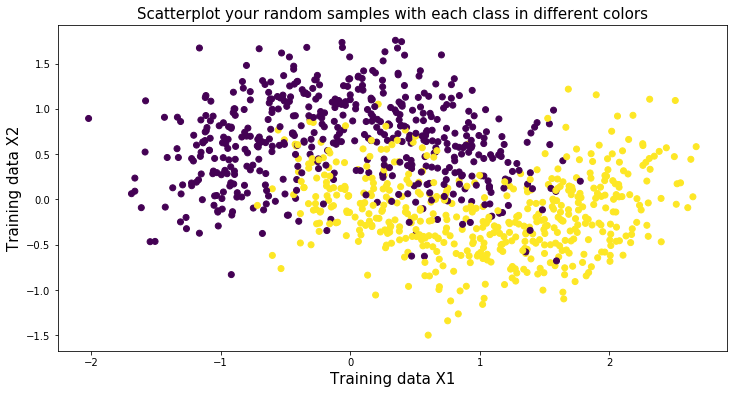

(d)


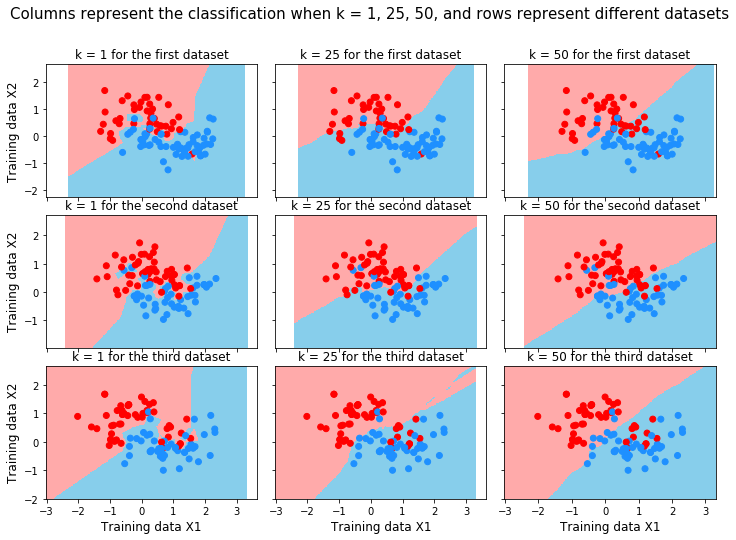

In [254]:
from sklearn.datasets import make_moons as mm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# a
training_set = mm(n_samples=1000, noise=0.35)
x0, y0 = training_set
# b
print("(b)")
plt.figure(figsize=(12, 6))
plt.scatter(x0[:,0],x0[:,1],marker='o',c=y0)
plt.xlabel("Training data X1",fontsize=15)
plt.ylabel("Training data X2",fontsize=15)
plt.title(
    "Scatterplot your random samples with each class "
    "in different colors", fontsize=15)
plt.show()
# c
sub_i_1 = np.random.choice(1000, 100)
sub_i_2 = np.random.choice(1000, 100)
sub_i_3 = np.random.choice(1000, 100)
subset_data = [(np.array([x0[i] for i in sub_i_1]), 
                np.array([y0[i] for i in sub_i_1])),
               (np.array([x0[i] for i in sub_i_2]), 
                np.array([y0[i] for i in sub_i_2])),
               (np.array([x0[i] for i in sub_i_3]), 
                np.array([y0[i] for i in sub_i_3]))]

ks = [1,25,50]
classifier_lst = []
for i in range(3):
    for x, y in subset_data:
        neigh = KNeighborsClassifier(n_neighbors=ks[i])
        neigh.fit(x, y)
        classifier_lst.append(neigh)

# d
print("(d)")
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import Grid

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#87CEEB'])
cmap_dark = ListedColormap(['#FF0000', '#1E90FF'])
h = .02
# count is for the ax position, c is for choosing classifier
count, c = 0, 0
fig = plt.figure(figsize=(12, 8))
grid = Grid(fig, rect=111, nrows_ncols=(3,3), 
            axes_pad=0.25, label_mode='L')
axs = [ax for ax in grid]
title_k, title_data = [1,25,50], ["first", "second", "third"]
for i in range(3):
    for X, y in subset_data:
        # calculate min, max and limits
        ax = axs[count]
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # predict class using data and kNN classifier
        Z = classifier_lst[c].predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
        # Plot also the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dark)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        count = (count+3)%9
        ax.set_xlabel('Training data X1',fontsize=12)
        ax.set_ylabel('Training data X2',fontsize=12)
        ax.set_title('k = {} for the {} dataset'
                     .format(title_k[count%3], 
                             title_data[c%3]),fontsize=12)
        c += 1
    count += 1
plt.suptitle("Columns represent the classification when k = 1, 25, 50, " 
             "and rows represent different datasets",fontsize=15)

plt.show()

**ANSWER**

(e)

The first row shows the result of k=1. Its plots' boundaries appear to best separate the two classes, but they also vary the most when data change by columns; The second row shows the result of k=25. Its plots' boundaries do a nice job on separating, and they not vary a lot when data change by columns; The last row shows the result of k=50. Its plots' boundaries do a really bad job on separating the data, but their boundaries also have very little change when data change.

(f)

When k=1, the classification model has really high variance and low bias, so it fits good for the data, but small changes in the training data can result in large changes in the classification result; when k increases to 25, the variance of the model goes down while the bias goes up, so it does a little bit worse on classification, but becomes more steady when data change; when k increases to 50, the bias of the model becomes really high, so it does a bad job on classification, while the variance of the model becomes really low so it changes very little when data change.
We should make good use of the bias-variance tradeoff and choose the best parameter for the model to make bias and variance both relatively low.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

(b)


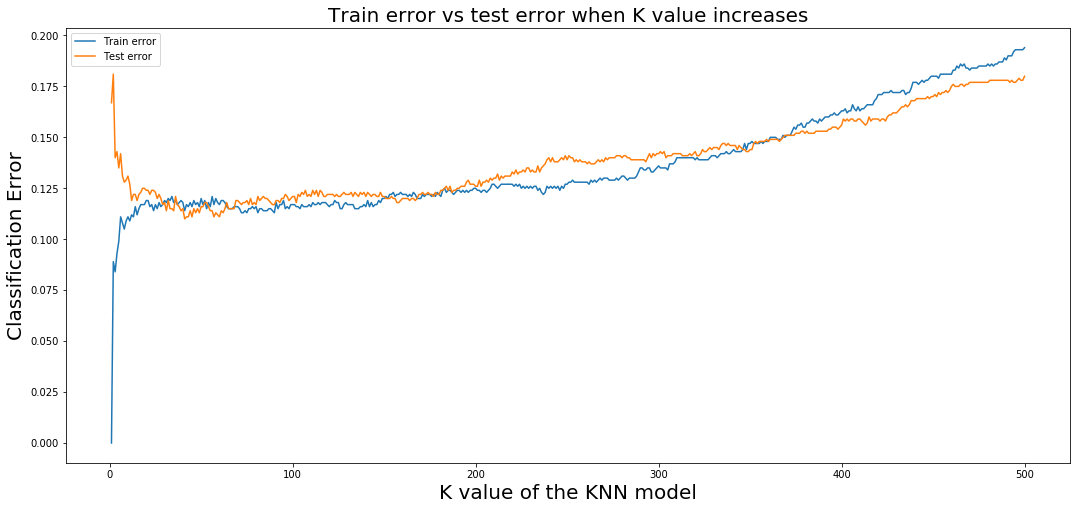

In [272]:
from sklearn.datasets import make_moons as mm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# a
test_set = mm(n_samples=1000, noise=0.35)
x_t, y_t = test_set
# b
print("(b)")
def error(y,y_hat):
    nvalues = len(y)
    error = sum(y != y_hat) / nvalues
    return error
train_err, test_err = [], []
for k in range(1, 501):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x0, y0)
    y_hat_train = neigh.predict(x0)
    y_hat_test = neigh.predict(x_t)
    train_err.append(error(y0,y_hat_train))
    test_err.append(error(y_t,y_hat_test))
x_axis = list(range(1,501))
plt.figure(figsize=(18, 8))
line1, = plt.plot(x_axis, train_err, label = "Train error")
line2, = plt.plot(x_axis, test_err, label = "Test error")
plt.legend(handles=[line1, line2])
plt.xlabel("K value of the KNN model",fontsize=20)
plt.ylabel("Classification Error",fontsize=20)
plt.title("Train error vs test error when K value increases",fontsize=20)

plt.show()

(c) The train error starts from 0 when k is 1 and increases when k increases, while the test error starts from about 0.18 and first goes down when k increases and then gradually goes up when k exceed.

(d) The lower k values represent high variance: when k = 1 the model has the highest variance; the higher k values represent high bias: when k = 500 the model has the highest bias.

In [274]:
# e
print(min(test_err))
best_k = test_err.index(min(test_err))+1
print(best_k)

0.11
41


(e) The optimal value of k is 27 since the model has the lowest test error 0.11 when k is 41, where it has relatively low variance and low bias.

(f) The parameters of other models control the flexibility of other models. For example, in linear regression, the number of predictors control the flexibility of the linear model.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

In [266]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

(a)


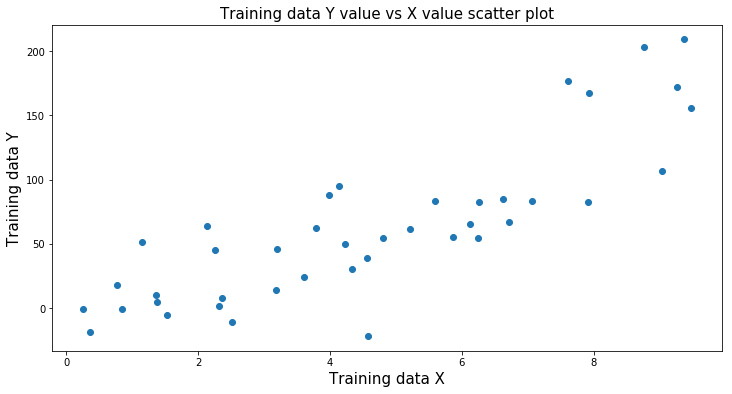

(b)
R square:  0.7014590913812251
Mean square error:  1052.5853662498014
coefficient:  18.303206847693165
intercept:  -21.73078292905422
The estimated model is y=18.30+(-21.73)*x
(c)
R square:  0.7219455369854199
Mean square error:  980.3549541792602
coefficient:  25.08280535865612 -23.33063095557925
intercept:  -23.680150129907396
The estimated model is y=-23.68+(25.08)*x + (-23.33)*log(x)
(d)


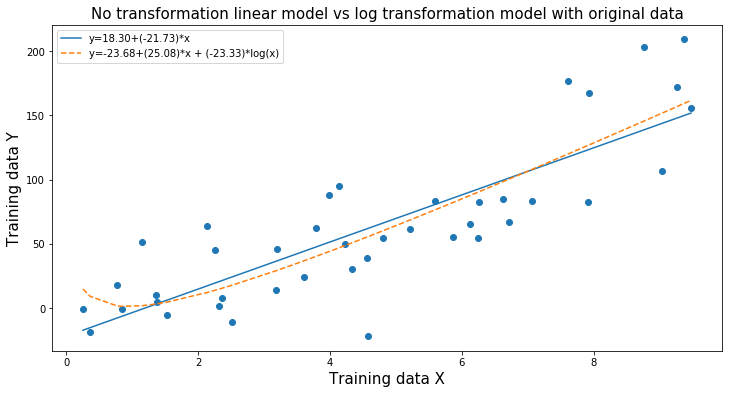

(e)
R square for not transformed model on test data:  0.5556465885794163
Mean square error for not transformed model on test data:  2023.3121088887128
R square for log transformed model on test data:  0.6318499871688507
Mean square error for log transformed model on test data:  1676.3287052696057


In [267]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# a
print("(a)")
x_tr = np.array(x_train).reshape(-1,1)
y_tr = np.array(y_train)
x_te = np.array(x_test).reshape(-1,1)
y_te = np.array(y_test)

plt.figure(figsize=(12,6))
plt.scatter(x_tr, y_tr)
plt.xlabel("Training data X",fontsize= 15)
plt.ylabel("Training data Y",fontsize= 15)
plt.title("Training data Y value vs X value scatter plot",fontsize=15)
plt.show()
# b
print("(b)")
reg1 = LinearRegression().fit(x_tr, y_tr)
y_pred = reg1.predict(x_tr)
coef1 = float(reg1.coef_[0])
inter1 = float(reg1.intercept_)
print("R square: ", r2_score(y_tr, y_pred))
print("Mean square error: ", mean_squared_error(y_tr, y_pred))
print("coefficient: ", coef1)
print("intercept: ", inter1)
model1_func = "y={:.2f}+({:.2f})*x".format(coef1,inter1)
print("The estimated model is " + model1_func)

# c
from math import log
print("(c)")
x_tr_log_lst = list(map(list,zip(x_train,[log(float(_)) for _ in x_tr])))
x_tr_log = np.array(x_tr_log_lst)
reg2 = LinearRegression().fit(x_tr_log, y_tr)
y_pred2 = reg2.predict(x_tr_log)
coef2_1 = float(reg2.coef_[0])
coef2_2 = float(reg2.coef_[1])
inter2 = float(reg2.intercept_)
print("R square: ", r2_score(y_tr, y_pred2))
print("Mean square error: ", mean_squared_error(y_tr, y_pred2))
print("coefficient: ", coef2_1, coef2_2)
print("intercept: ", inter2)
model2_func = ("y={:.2f}+({:.2f})*x + ({:.2f})*log(x)"
               .format(inter2,coef2_1, coef2_2))
print("The estimated model is "+ model2_func)

# d
print("(d)")
plt.figure(figsize=(12,6))
plt.scatter(x_train, y_train)
new_x_train = np.sort(x_train)
y_p1 = np.multiply(coef1,new_x_train)+inter1
line1, = plt.plot(new_x_train, y_p1, linestyle="-", label = model1_func)
y_p2 = (np.multiply(coef2_1,new_x_train)
        +np.multiply(coef2_2,np.log(new_x_train))+inter2)
line2, = plt.plot(new_x_train, y_p2, linestyle="--", label = model2_func)
plt.legend(handles=[line1, line2])
plt.xlabel("Training data X",fontsize=15)
plt.ylabel("Training data Y",fontsize=15)
plt.title("No transformation linear model vs "
          "log transformation model with original data",fontsize=15)
plt.show()

# e
print("(e)")
x_te_log_lst = list(map(list,zip(x_test,[log(float(_)) for _ in x_te])))
x_te_log = np.array(x_te_log_lst)
# test for not transformed model
y_test1 = reg1.predict(x_te)
print("R square for not transformed model on test data: ",
      r2_score(y_te, y_test1))
print("Mean square error for not transformed model on test data: ",
      mean_squared_error(y_te, y_test1))
# test for squared transformed model
y_test2 = reg2.predict(x_te_log)
print("R square for log transformed model on test data: ",
      r2_score(y_te, y_test2))
print("Mean square error for log transformed model on test data: ",
      mean_squared_error(y_te, y_test2))

(f)

The linear model with log transformation perform better on both the training data and the test data, because log linear model has both larger R square and smaller mean square error, which shows that it performs better than model without transformation.

(g)

If the test data were significantly different from the training dataset, our model cannot catch the innate pattern of the test dataset. The predictive ability of the models would be significantly low. Especially if our model has higher variance, the predictive ability would go down significantly.

We could use k-Fold Cross-Validation to pick k test dataset to reduce the impact of extreme test dataset that were significantly different from the training dataset. 